# Regcoil
Stellacode includes the [regcoil](https://github.com/landreman/regcoil) algorithm for finding the optimal current density for reproducing a given magnetic field from a given coil surface.

In [1]:
from mayavi import mlab
%gui qt

from stellacode.costs import EMCost
from stellacode.surface import IntegrationParams
from stellacode.surface import WrappedCoil
from stellacode.tools.plots import plot_j2D_CWS

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


The first step is to choose a plasma configuration and create the regcoil solver object. Some predefined configuration are available in stellacode. Let's choose the W7X configuration.

In [2]:
from stellacode.definitions import w7x_plasma
plasma_config = w7x_plasma

In [3]:
em_cost = EMCost.from_plasma_config(
    plasma_config=w7x_plasma,
    integration_par=IntegrationParams(num_points_u=16, num_points_v=16),
)

Plot a field period of the LCFS

In [4]:
em_cost.Sp.plot()

Plot the whole LCFS

In [5]:
em_cost.Sp.plot(nfp=em_cost.Sp.nfp)

Then we can build a coil factory (a class used to create coil objects):

In [6]:
coil_factory = WrappedCoil.from_plasma(
    surf_plasma=em_cost.Sp,
    surf_type="toroidal",
    n_harmonics=4,
    factor=6,
)

Then we can build the coil operator, which is a linear operator acting on current parameters and returning a current object:

In [7]:
coil_op = coil_factory()

We can retrieve the current parameters and use them to build a coil surface:

Then we can solve for the value of $\lambda$ given to EMCost

In [8]:
em_cost.lamb = 1e-30
cost, metrics, results, S = em_cost.cost(coil_op)
metrics

{'max_deltaB_normal': Array(0.15636286, dtype=float32),
 'deltaB_B_rmse': Array(1.5539621, dtype=float32),
 'deltaB_B_max': Array(0.61455816, dtype=float32),
 'cost_B': Array(1.941057, dtype=float32),
 'em_cost': Array(1.941057, dtype=float32),
 'cost_J': Array(3.531638e+15, dtype=float32),
 'max_j': Array(16917782., dtype=float32)}

In [9]:
coil_surface = coil_op.get_coil(results.phi_mn_wnet_cur) 

Then we can plot the current obtained over the CWS in 3D

In [10]:
coil_surface.plot(
    vector_field=coil_surface.j_3d,
    reduce_res=1,
    quiver_kwargs=dict(
        line_width=2,
        scale_factor=0.5,
    ),
)

Or plot the current obtained in 2D unwrapping the CWS

(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': 'Current over the unwrapped coil winding surface'}, xlabel='v', ylabel='u'>)

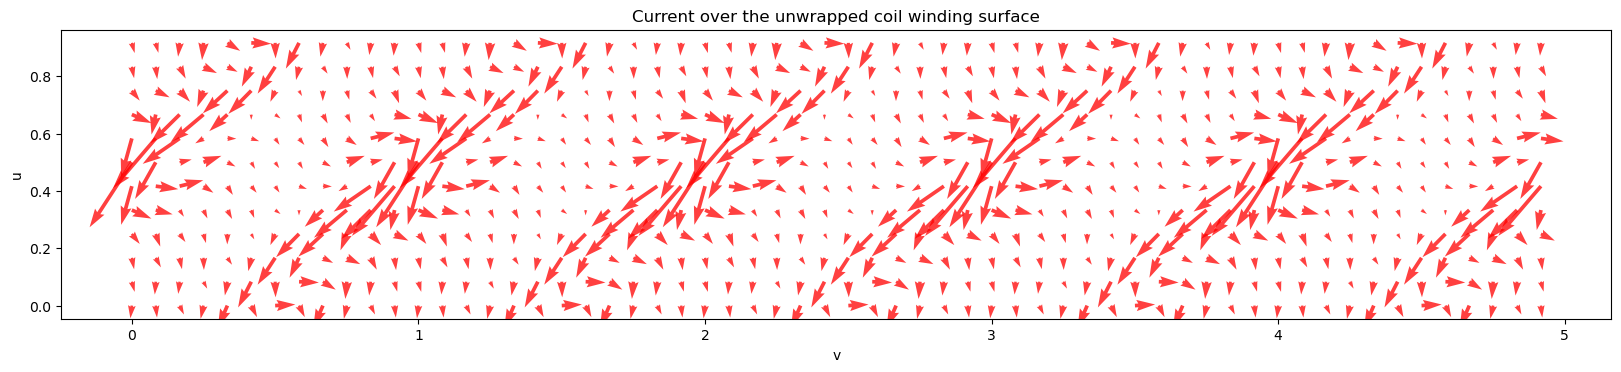

In [11]:
plot_j2D_CWS(coil_surface)